In [355]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from timeit import default_timer as timer
import matplotlib.pyplot as plt

df_old = pd.read_csv('spambase_old.csv')
df_new = pd.read_csv('spambase_new.csv')
names = list(df_old)
data_old = np.array(df_old.values)
data_new = np.array(df_new.values)

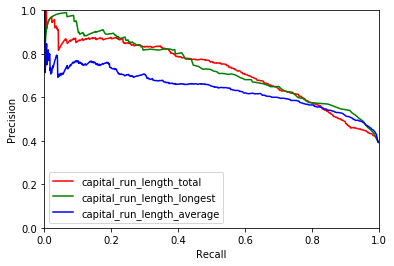

In [356]:
###Task1###

col = "rgb"
labs = ['capital_run_length_total', 'capital_run_length_longest', 'capital_run_length_average']
for i in range(1,4):
    pr = {}
    A = np.unique(data_old[:, -5+i])
    for a in A:
        cls_res = (data_old[:, -5 + i] >= a)
        tp = np.sum(data_old[cls_res, -1])
        tru = np.sum(cls_res)
        prec = tp/tru
        fn = np.sum(data_old[np.where(cls_res, False, True), -1])
        recall = tp / (tp + fn)
        pr[recall] = prec
    sork = np.sort(list(pr.keys()))
    val = []
    for k in sork:
        val.append(pr[k])
    plt.plot(sork, val, color=col[i-1], label=labs[i-1])



plt.legend()
plt.ylim(ymax=1, ymin=0.0)
plt.xlim(xmax=1.0, xmin=0.0)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()



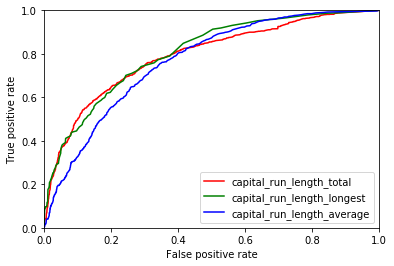

In [357]:
###Task1###

col = "rgb"
labs = ['capital_run_length_total', 'capital_run_length_longest', 'capital_run_length_average']
for i in range(1,4):
    pr = {}
    A = np.unique(data_old[:, -5+i])
    for a in A:
        cls_res = (data_old[:, -5 + i] >= a)
        fp = np.sum(1-data_old[cls_res, -1])
        tn = np.sum(1-data_old[np.where(cls_res, False, True), -1])
        fpr = fp/(fp + tn)
        tp = np.sum(data_old[cls_res, -1])
        fn = np.sum(data_old[np.where(cls_res, False, True), -1])
        tpr = tp / (tp + fn)
        pr[fpr] = tpr
    sork = np.sort(list(pr.keys()))
    val = []
    for k in sork:
        val.append(pr[k])
    plt.plot(sork, val, color=col[i-1], label=labs[i-1])



plt.legend()
plt.ylim(ymax=1, ymin=0.0)
plt.xlim(xmax=1.0, xmin=0.0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [358]:
###Task2###
from sklearn import metrics
auc = np.zeros(data_old.shape[1])
for i in range(data_old.shape[1] - 1):
    pr = {}
    A = np.unique(data_old[:,i])
    for a in A:
        cls_res = (data_old[:, i] >= a)
        fp = np.sum(1-data_old[cls_res, -1])
        tn = np.sum(1-data_old[np.where(cls_res, False, True), -1])
        fpr = fp/(fp + tn)
        tp = np.sum(data_old[cls_res, -1])
        fn = np.sum(data_old[np.where(cls_res, False, True), -1])
        tpr = tp / (tp + fn)
        pr[fpr] = tpr
    sork = np.sort(list(pr.keys()))
    val = []
    for k in sork:
        val.append(pr[k])
    auc[i] = metrics.auc(sork, val)
auc_sorted = np.argsort(auc)[::-1]

for arg in auc_sorted[:10]:
    print(str(names[arg]) + "   AUC: " + str(auc[arg]))

char_freq_!   AUC: 0.82587724391
capital_run_length_longest   AUC: 0.804494399418
capital_run_length_average   AUC: 0.791570872328
word_freq_your   AUC: 0.780710000542
char_freq_$   AUC: 0.778085816245
capital_run_length_total   AUC: 0.766397436195
word_freq_free   AUC: 0.728611659429
word_freq_our   AUC: 0.709520757375
word_freq_you   AUC: 0.706469272273
word_freq_remove   AUC: 0.697891673053


In [359]:
###Task3###
class Node:
        def delim(self, delim, col):
            self.delimiter = delim
            self.col = col
            self.left = Node()
            self.right = Node()
            self.isList = False
        def classified(self, cls):
            self.cls = cls
            self.isList = True

class DecisionTree:
    def __init__(self):
        self.root = Node()
    
    def classify(self, data):
        classes = np.zeros(data.shape[0])
        for i in range(data.shape[0]):
            row = data[i]
            nod = self.root
            while not nod.isList:
                if row[nod.col] >= nod.delimiter:
                    nod = nod.right
                else:
                    nod = nod.left
            classes[i] = nod.cls
        return classes
            

In [360]:
def IG(X, uniq):
    R1sum1 = np.sum(X*uniq, axis=0)
    lnR1 = np.sum(uniq, axis=0)
    R1sum0 = lnR1 - R1sum1
    R0sum1 = np.sum(X*(1-uniq), axis=0)
    lnR0 = np.sum(1-uniq, axis=0)
    R0sum0 = lnR0 - R0sum1
    return entropy(X) - lnR1*ent_from_sum(R1sum1, R1sum0, lnR1)/X.shape[0] - lnR0*ent_from_sum(R0sum1, R0sum0, lnR0)/X.shape[0]

def entropy(X):
    sum1 = np.sum(X)
    ln = X.shape[0]
    sum0 = ln - sum1
    return -(sum1/ln)*np.log(sum1/ln) - (sum0/ln)*np.log(sum0/ln)

def ent_from_sum(sum1, sum0, ln):
    ln = np.where(ln==0, 1, ln)
    sum1lo = np.where(sum1==0, 1, sum1)
    sum0lo = np.where(sum0==0, 1, sum0)
    return -(sum1/ln)*np.log(sum1lo/ln) - (sum0/ln)*np.log(sum0lo/ln)

In [361]:
def Gini(X, uniq):
    R1sum1 = np.sum(X*uniq, axis=0)
    lnR1 = np.sum(uniq, axis=0)
    R1sum0 = lnR1 - R1sum1
    R0sum1 = np.sum(X*(1-uniq), axis=0)
    lnR0 = np.sum(1-uniq, axis=0)
    R0sum0 = lnR0 - R0sum1
    lnR1 = np.where(lnR1==0, 1, lnR1)
    lnR0 = np.where(lnR0==0, 1, lnR0)
    gini_r1 = 2 * R1sum1 * R1sum0/(lnR1**2)
    gini_r0 = 2 * R0sum1 * R0sum0/(lnR0**2)
    max_r1 = np.max(gini_r1)
    max_r0 = np.max(gini_r0)
    gini_r1 = np.where(gini_r1==0, max_r1 + 1, gini_r1)
    gini_r0 = np.where(gini_r0==0, max_r0 + 1, gini_r0)
    ln = X.shape[0]
    return (gini_r1 * lnR1 + gini_r0 * lnR0)/ln

In [380]:

def DesT(data, node, cur_depth, max_depth, inf = "IG"):
    if cur_depth < max_depth:
        def bestDelim(i):
            mx = 0
            separated = (data[:, i].reshape((data.shape[0], 1)) >= uniq[i])
            X = data[:, -1].reshape((data.shape[0], 1))
            ig, max_arg = 0, 0
            if inf == "IG":
                ig = IG(X, separated)
                max_arg = np.argmax(ig)
            elif inf == "Gini":
                ig = Gini(X, separated)
                max_arg = np.argmin(ig)
            return ig[max_arg], uniq[i][max_arg], max_arg, separated[:, max_arg] 
        mx_ig, mx_separator, mx_max_arg, mx_separated, mx_i = -1, 0, 0, 0, 0
        if inf == "Gini":
            mx_ig = np.inf
        for i in range(data.shape[1] - 1) :
            ig, separator, max_arg, separated = bestDelim(i)
            if inf == "IG": 
                if ig > mx_ig:
                    mx_i = i
                    mx_ig, mx_separator, mx_max_arg, mx_separated = ig, separator, max_arg, separated
            elif inf == "Gini":
                if ig < mx_ig:
                    mx_i = i
                    mx_ig, mx_separator, mx_max_arg, mx_separated = ig, separator, max_arg, separated
#         if mx_ig == np.inf:
#             print(ig)
        if mx_separated.shape[0] > np.sum(mx_separated) and np.sum(mx_separated) != 0:
            node.delim(mx_separator, mx_i)
            r_arg = np.argwhere(mx_separated)
            l_arg = np.argwhere(1 - mx_separated)
            r_arg.reshape((r_arg.shape[0],))
            l_arg.reshape((l_arg.shape[0],))
            data_r = data[r_arg][:,0,:]
            data_l = data[l_arg][:,0,:]
            if data_r[:,-1].all():
                node.right.classified(1)
            elif (1-data_r[:,-1]).all():
                node.right.classified(0)
            else:
                DesT(data_r, node.right, cur_depth+1, max_depth, inf)
            if data_l[:,-1].all():
                node.left.classified(1)
            elif (1-data_l[:,-1]).all():
                node.left.classified(0)
            else:
                DesT(data_l, node.left, cur_depth+1, max_depth, inf)
            
        elif np.sum(mx_separated) == 0:
            node.classified(0)
        else:
            node.classified(1)
    elif cur_depth==max_depth:
        ln = data[:, -1].shape[0]
        ones = np.sum(data[:, -1])
        if ones >= ln//2:
            node.classified(1)
        else:
            node.classified(0)    


In [444]:
uniq = [np.unique(row) for row in data_old.T]

In [364]:
for i in range(2, 11):
    dt = DecisionTree()   
    DesT(data_old, dt.root, 0, i, "IG")
    cls = dt.classify(data_new)
    ln = data_new.shape[0]
    err = 0
    for j in range(ln):
        if cls[j] != data_new[j,-1]:
            err += 1
    print("depth: " + str(i) + " error: " + str(err/ln))

depth: 2 error: 0.1465798045602606
depth: 3 error: 0.13463626492942454
depth: 4 error: 0.09229098805646037
depth: 5 error: 0.08469055374592833
depth: 6 error: 0.08686210640608034
depth: 7 error: 0.0781758957654723
depth: 8 error: 0.0781758957654723
depth: 9 error: 0.07709011943539631
depth: 10 error: 0.07926167209554831


In [365]:
for i in range(2, 11):
    dt = DecisionTree()   
    DesT(data_old, dt.root, 0, i, "Gini")
    cls = dt.classify(data_new)
    ln = data_new.shape[0]
    err = 0
    for j in range(ln):
        if cls[j] != data_new[j,-1]:
            err += 1
    print("depth: " + str(i) + " error: " + str(err/ln))

depth: 2 error: 0.1465798045602606
depth: 3 error: 0.11292073832790445
depth: 4 error: 0.10097719869706841
depth: 5 error: 0.09120521172638436
depth: 6 error: 0.09229098805646037
depth: 7 error: 0.0781758957654723
depth: 8 error: 0.08034744842562432
depth: 9 error: 0.08794788273615635
depth: 10 error: 0.08903365906623235


In [499]:
###Task4###
aua = np.append(auc_sorted[:10], [data_old.shape[1]-1])
uniq = [np.unique(row) for row in data_old[:,aua].T]

In [367]:
for i in range(2, 11):
    dt = DecisionTree()   
    DesT(data_old[:,aua], dt.root, 0, i, "IG")
    cls = dt.classify(data_new[:,aua])
    ln = data_new.shape[0]
    err = 0
    for j in range(ln):
        if cls[j] != data_new[:,aua][j,-1]:
            err += 1
    print("depth: " + str(i) + " error: " + str(err/ln))

depth: 2 error: 0.16720955483170466
depth: 3 error: 0.1476655808903366
depth: 4 error: 0.10532030401737243
depth: 5 error: 0.10749185667752444
depth: 6 error: 0.10966340933767643
depth: 7 error: 0.09771986970684039
depth: 8 error: 0.09229098805646037
depth: 9 error: 0.10097719869706841
depth: 10 error: 0.10097719869706841


In [500]:
for i in range(2, 11):
    dt = DecisionTree()   
    DesT(data_old[:,aua], dt.root, 0, i, "Gini")
    cls = dt.classify(data_new[:,aua])
    ln = data_new.shape[0]
    err = 0
    for j in range(ln):
        if cls[j] != data_new[:,aua][j,-1]:
            err += 1
    print("depth: " + str(i) + " error: " + str(err/ln))

depth: 2 error: 0.16720955483170466
depth: 3 error: 0.12269272529858849
depth: 4 error: 0.10640608034744843
depth: 5 error: 0.10857763300760044
depth: 6 error: 0.10314875135722042
depth: 7 error: 0.10097719869706841
depth: 8 error: 0.20846905537459284
depth: 9 error: 0.20738327904451684
depth: 10 error: 0.21281216069489686


In [383]:
###Task5###
def DesTP(data, node, cur_depth, max_depth, inf = "IG"):
    if cur_depth < max_depth:
        def bestDelim(i):
            mx = 0
            separated = (data[:, i].reshape((data.shape[0], 1)) >= uniq[i])
            X = data[:, -1].reshape((data.shape[0], 1))
            ig, max_arg = 0, 0
            if inf == "IG":
                ig = IG(X, separated)
                max_arg = np.argmax(ig)
            elif inf == "Gini":
                ig = Gini(X, separated)
                max_arg = np.argmin(ig)
            return ig[max_arg], uniq[i][max_arg], max_arg, separated[:, max_arg] 
        mx_ig, mx_separator, mx_max_arg, mx_separated, mx_i = -1, 0, 0, 0, 0
        if inf == "Gini":
            mx_ig = np.inf
        for i in range(data.shape[1] - 1) :
            ig, separator, max_arg, separated = bestDelim(i)
            if inf == "IG": 
                if ig > mx_ig:
                    mx_i = i
                    mx_ig, mx_separator, mx_max_arg, mx_separated = ig, separator, max_arg, separated
            elif inf == "Gini":
                if ig < mx_ig:
                    mx_i = i
                    mx_ig, mx_separator, mx_max_arg, mx_separated = ig, separator, max_arg, separated
        if mx_separated.shape[0] > np.sum(mx_separated) and np.sum(mx_separated) != 0:
            node.delim(mx_separator, mx_i)
            r_arg = np.argwhere(mx_separated)
            l_arg = np.argwhere(1 - mx_separated)
            r_arg.reshape((r_arg.shape[0],))
            l_arg.reshape((l_arg.shape[0],))
            data_r = data[r_arg][:,0,:]
            data_l = data[l_arg][:,0,:]
            if data_r[:,-1].all():
                node.right.classified(1)
            elif (1-data_r[:,-1]).all():
                node.right.classified(0)
            else:
                DesTP(data_r, node.right, cur_depth+1, max_depth, inf)
            if data_l[:,-1].all():
                node.left.classified(1)
            elif (1-data_l[:,-1]).all():
                node.left.classified(0)
            else:
                DesTP(data_l, node.left, cur_depth+1, max_depth, inf)
            
        elif np.sum(mx_separated) == 0:
            node.classified(0)
        else:
            node.classified(1)
    elif cur_depth==max_depth:
        ln = data[:, -1].shape[0]
        ones = np.sum(data[:, -1])
        node.classified(ones/ln)

In [459]:
def RandomForest(treenum, depth):  
    trees = []
    for i in range(treenum):
        trees.append(DecisionTree())
    params = np.random.randint(data_old.shape[1]-1, size = (treenum, 9))
    params[:,-1] = data_old.shape[1]-1
    rand_dat = np.random.randint(data_old.shape[0] - 1, size = (treenum, data_old.shape[0]))
    for i in range(treenum):
        global uniq
        uniq = [np.unique(row) for row in data_old[:,params[i]].T]
        DesTP((data_old[rand_dat[i]])[:,params[i]], trees[i].root, 0, depth, "IG")
    cls = 0
    for i in range(treenum):
        cls = cls + trees[i].classify(data_new[:, params[i]])
    cls = cls / treenum
    return cls

In [494]:
cls = RandomForest(50, 9)

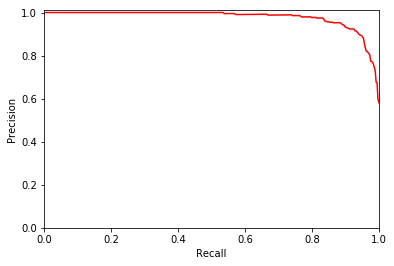

In [495]:
def drawPrecRec(cls): 
    pr = {}
    A = np.arange(0.0, 1.0, 0.001)
    for a in A:
        cls_res = cls >= a
        tp = np.sum(data_new[cls_res, -1])
        tru = np.sum(cls_res)
        if tru > 0:
            prec = tp/tru
            fn = np.sum(data_new[np.where(cls_res, False, True), -1])
            recall = tp / (tp + fn)
            pr[recall] = prec
    sork = np.sort(list(pr.keys()))
    val = []
    for k in sork:
        val.append(pr[k])
    plt.plot(sork, val, color='r')

    plt.ylim(ymax=1.01, ymin=0.0)
    plt.xlim(xmax=1.0, xmin=0.0)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()
    
drawPrecRec(cls)

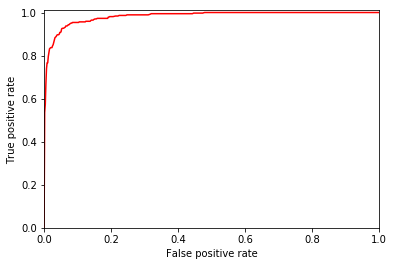

In [496]:
def drawFpTp(cls):    
    pr = {}
    A = np.arange(0.0, 1.0, 0.001)
    for a in A:
        cls_res = cls >= a
        fp = np.sum(1-data_new[cls_res, -1])
        tn = np.sum(1-data_new[np.where(cls_res, False, True), -1])
        fpr = fp/(fp + tn)
        tp = np.sum(data_new[cls_res, -1])
        fn = np.sum(data_new[np.where(cls_res, False, True), -1])
        tpr = tp / (tp + fn)
        pr[fpr] = tpr
    sork = np.sort(list(pr.keys()))
    val = []
    for k in sork:
        val.append(pr[k])
    plt.plot(sork, val, color='r')

    plt.ylim(ymax=1.01, ymin=0.0)
    plt.xlim(xmax=1.0, xmin=0.0)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.show()
    
drawFpTp(cls)